In [1]:
import sys
sys.path.append(".")
import smo_lib.io as smo_io

import matplotlib.pyplot as plt

import pandas

In [2]:
cell_df = pandas.read_csv("smo_data/cell_type_classification_filtered.csv")
mito_df = smo_io.get_mito_dfs(cell_df["cell_id"].unique())


In [3]:
df = mito_df\
    .query("cell_subtype!='unknown_type'")\
    .groupby(["cell_type", "cell_subtype"])\
    .apply(lambda dfh: pandas.Series({"Number of neurons": len(dfh["cellid"].unique()), "Number of mitochondria": len(dfh)}))\
    .sort_values(by="Number of neurons", ascending=False)

number_of_celltype=len(df)

idx = pandas.MultiIndex.from_product([["All cells"], [""]], names=["cell_type", "cell_subtype"])

df = df.append(df.agg(["sum"]).set_index(idx))

df = df.reset_index(drop=False)
df = df.replace(to_replace="pyramidal", value="excitatory")
df = df.rename(columns={
    "Number of neurons": "Number of\n neurons", 
    "Number of mitochondria": "Number of\n mitochondria",
    "cell_type": "Neuron\n class",
    "cell_subtype": "Neuron\n type"
})

In [4]:
!mkdir -p figures

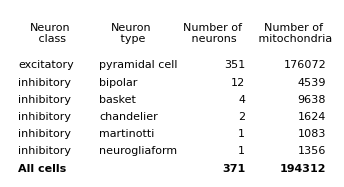

In [5]:


fig, ax = plt.subplots(figsize=(9/2.54, 5/2.54))
ax.axis('off')
#table = pandas.plotting.table(ax, df, loc="center", edges="open", colWidths=[0.33, 0.33, 0.33])
table =ax.table(cellText=df.values, colLabels=df.keys(), loc="center", edges="open")
table.auto_set_font_size(False)
table.set_fontsize(8)
cell_dict = table.get_celld()
no_columns = len(df.keys())
no_rows = len(df)+1
for i in range(no_columns):
    cell_dict[(0,i)].set_height(.3)

for i in range(no_columns):
    cell_dict[(number_of_celltype+1, i)].set_text_props(fontweight="bold")
    
for row in range(1, no_rows):
    for col in [0,1]:
        cell_dict[(row, col)].set_text_props(ha="left")
fig.tight_layout()
plt.savefig("figures/microns_overview.svg", bbox_inches="tight", transparent=True)


### How to export

- matplotlib png https://pandas.pydata.org/docs/reference/api/pandas.plotting.table.html